In [ ]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/harpo.csv")
df.head()

,grade,tutor
0,65,Anastasia
1,72,Bernadette
2,66,Bernadette
3,74,Anastasia
4,73,Anastasia


## 데이터 요약
- 각 틀래스 학생들의 데이터 분포 요약
- groupby : 평균, 표준편차, 인원 카운트

In [ ]:
DF = df.groupby('tutor')
result = DF['grade'].agg(['mean', 'std', 'count']).reset_index()
result

,tutor,mean,std,count
0,Anastasia,74.533333,8.998942,15
1,Bernadette,69.055556,5.774918,18


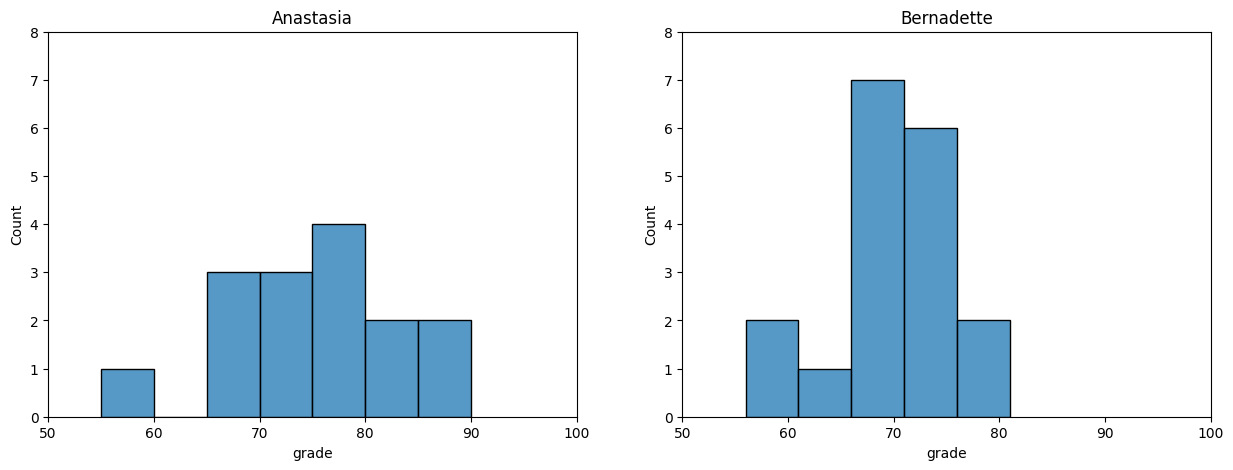

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 서브플롯 생성
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

Anastasia = pd.DataFrame(df.loc[df['tutor'] == 'Anastasia']['grade']).reset_index(drop=True)
Bernadette = pd.DataFrame(df.loc[df['tutor'] == 'Bernadette']['grade']).reset_index(drop=True)
sns.histplot(Anastasia['grade'], ax = axes[0], binwidth=5)
sns.histplot(Bernadette['grade'], ax = axes[1], binwidth=5)

# 각 서브플롯에 xlim, ylim, 제목 설정
axes[0].set_xlim(50, 100)
axes[1].set_xlim(50, 100)
axes[0].set_ylim(0, 8)
axes[1].set_ylim(0, 8)
axes[0].set_title('Anastasia')
axes[1].set_title('Bernadette')


plt.show()


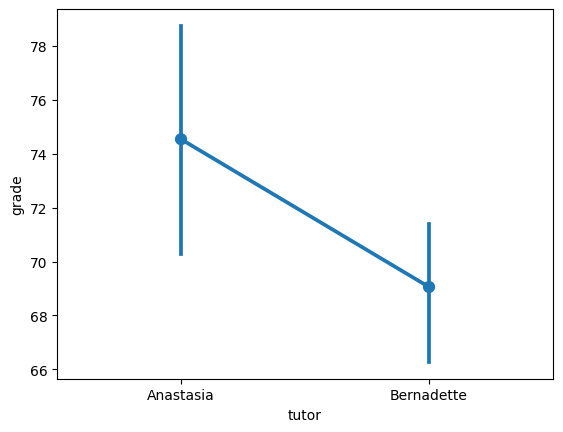

In [ ]:
# 점을 기준으로 생긴 막대는 신뢰구간을 의미함
sns.pointplot(x = 'tutor', y = 'grade', data = df)
plt.show()

In [ ]:
!pip install --upgrade pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7029 sha256=cd8f49082c82f831c9046f9fa52c2c536a90e114eb0c3d5ab5648b921b06200f
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


## 독립표본 T-검정
- 절차 1 : 정규성 검정
- 절차 2 : 등분산설 검정
- 절차 3 : ttest

In [ ]:
import pingouin as pg
pg.normality(df, dv='grade', group = 'tutor')

,W,pval,normal
tutor,,,
Anastasia,0.981857,0.980597,True
Bernadette,0.969075,0.780127,True


In [ ]:
# 등분산성 검정
pg.homoscedasticity(data = df, dv = 'grade', group = 'tutor')

,W,pval,equal_var
levene,2.128701,0.154622,True


In [ ]:
# ttest
from pingouin import ttest
ttest(Anastasia['grade'], Bernadette['grade'], correction=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.115432,31,two-sided,0.042529,"[0.2, 10.76]",0.739561,1.755,0.53577


## 문제
1. 각 그룹에 대한 표본 평균을 구한다.
2. 귀무가설, 대립가설을 설정하세요.
3. 정규성 검정, 등분산성 검정 코드를 작성하시고, 결과를 해석하세요.
4. t-test 진행하고, t-통계량, p-value 구하세요.
5. 가설검정의 결과를 귀무가설을 기준으로 채택/기각 여부를 판단 내려주세요.
6. 조건 : pimgouin 라이브러리 사용안함, scipy 라이브러리만 사용.
--> 40분까지 파일 슬랙으로 제출하기

## 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('toothgrowth.csv')
df.head()

,len,supp,dose
0,4.2,VC,0.5
1,11.5,VC,0.5
2,7.3,VC,0.5
3,5.8,VC,0.5
4,6.4,VC,0.5


In [ ]:
df.groupby('supp')['len'].agg(['mean', 'std', 'count']).reset_index()

,supp,mean,std,count
0,OJ,20.663333,6.605561,30
1,VC,16.963333,8.266029,30


2. 귀무가설, 대립가설을 설정하세요.
- 귀무가설 : 투여한 약제별(OJ, VC)의 평균 치아의 길이는 같다.
- 대립가설 : 투여한 약제별(OJ, VC)의 평균 치아의 길이는 같지 않다.

3. 정규성 검정
- 첫번째 질문 : 정규성 검정 해야하는가?

- 두번째 질문 : 등분산성 검정

In [ ]:
from scipy import stats
stats.levene(df.loc[df['supp'] == 'VC', 'len'], df.loc[df['supp'] == 'OJ', 'len'])

LeveneResult(statistic=1.2135720656945064, pvalue=0.2751764616144053)

- p.val = 0.27
- 귀무가설 : 분산의 동질성 만족함

In [ ]:
from scipy.stats import stats

t_score, p_value = stats.ttest_ind(df.loc[df['supp'] == "VC", 'len'],
                                   df.loc[df['supp'] == 'OJ', 'len'],
                                   equal_var = True)

<ipython-input-21-6ef225728e19>:3: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  t_score, p_value = stats.ttest_ind(df.loc[df['supp'] == "VC", 'len'],


In [ ]:
t_score, p_value

(-1.91526826869527, 0.06039337122412849)

- 두 그룹간에 평균 차이 없음!
- 두 그룹간에 유의미하게

## 대응표본
- 체중 측정
- 식단 운동 프로그램

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/chico.csv")
df.head()

,id,grade_test1,grade_test2
0,student1,42.9,44.6
1,student2,51.8,54.0
2,student3,71.7,72.3
3,student4,51.6,53.4
4,student5,63.5,63.8


In [ ]:
df.describe()

,grade_test1,grade_test2
count,20.000000,20.000000
mean,56.980000,58.385000
std,6.616137,6.405612
min,42.900000,44.600000
25%,51.750000,53.100000
50%,57.700000,59.700000
75%,62.050000,63.050000
max,71.700000,72.300000


## 데이터 시각화

(41.46, 73.14)


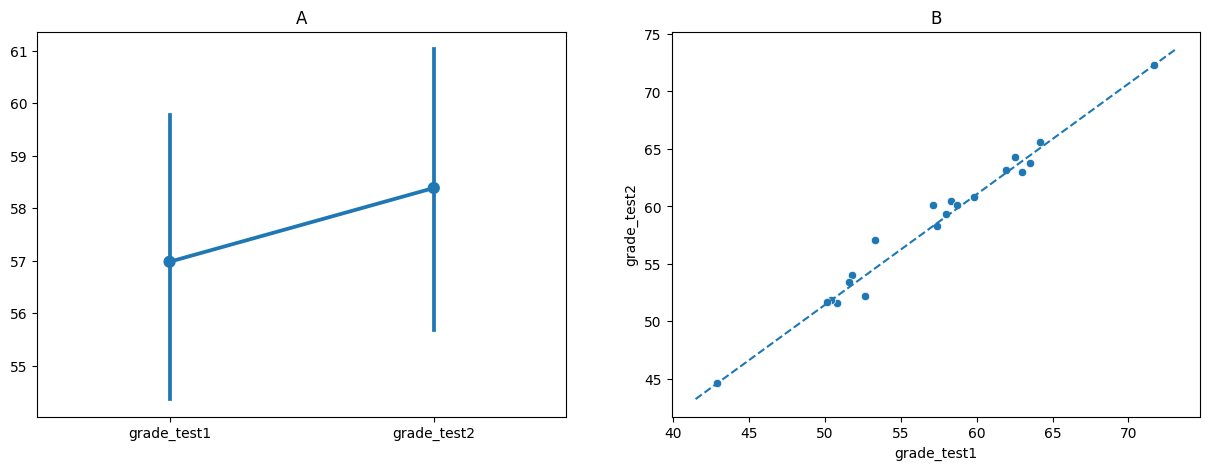

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 서브플롯 생성
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.pointplot(data = df, ax=ax[0])
sns.scatterplot(data = df, x = 'grade_test1', y = 'grade_test2', ax = ax[1])
print(ax[1].get_xlim())
ax[1].plot(ax[1].get_xlim(), ax[1].get_ylim(), ls = '--')


ax[0].set_title("A")
ax[1].set_title("B")

plt.show()

### 데이터 가공
- 실험 전후 차이를 보기 위해

<function matplotlib.pyplot.show(close=None, block=None)>

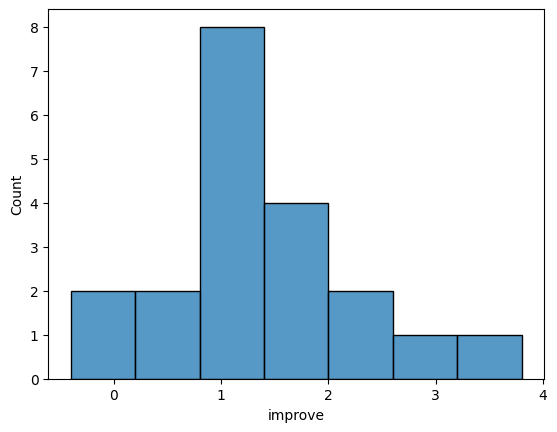

In [ ]:
df2 = df.copy()
df2['improve'] = df2['grade_test2'] - df2['grade_test1']

sns.histplot(data = df2, x = 'improve')
plt.show

## pingouin 라이브러리를 활용해 정규성 검정하기

In [ ]:
!pip install --upgrade pingouin

In [ ]:
import pingouin as pg

pg.normality(df2['improve'])

,W,pval,normal
improve,0.966399,0.677769,True


In [ ]:
from pingouin import ttest
ttest(df2['grade_test2'], df2['grade_test1'], paired = True) # 대응표본 검정을 하겠다.

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,6.475436,19,two-sided,0.000003,"[0.95, 1.86]",0.215765,5991.577,0.150446


## 문제
- 주어진 데이터(data/insectsprays.csv)에는 여러 지역에서 스프레이를 뿌리기 전에 측정한 곤충의 수와 스프레이를 뿌린 다음의 곤충의 수가 저장되어 있다. 해당 스프레이가 구제 효과가 있는지(즉, 스프레이를 뿌린 뒤 곤충의 수가 감소했는지) 대응(쌍체)표본 t-검정(Paired t-test)을 통해 답하고자 한다.
- 문제 1. before_spr과 after_spr의 차이를 확인하여 diff 변수 로 저장한다.
- 문제 2. 가설을 설정한다. (귀무가설 & 대립가설)
- 문제 3. 정규성을 확인한다.
- 문제 4. 정규성을 만족하면 ttest 진행 후, t_score, p_value값을 구한다.
- 문제 5. 귀무가설 채택/기각 여부를 확인한다.
- 문제 6. pointplot() 그래프를 작성하여 시각화로 차이 여부를 추가로 확인한다.

@@ scipy

In [ ]:
import pandas as pd
df = pd.read_csv("insectsprays.csv")
df.head()

,before_spr,after_spr
0,10,0
1,7,1
2,20,7
3,14,2
4,14,3


## 문제 1. before_spr과 after_spr의 차이를 확인하여 diff 변수 로 저장한다.

In [ ]:
diff = df['after_spr'] - df['before_spr']

print(diff.mean())

-12.0


## 문제 2. 가설을 설정한다. (귀무가설 & 대립가설)
- 귀무가설 : 스프레이를 뿌린 뒤의 곤충의 수의 평균은 스프레이를 뿌리기 전의 곤충의 수의 평균은 0이다.
- 대립가설 : 스프레이를 뿌린 뒤의 곤충의 수의 평균은 스프레이를 뿌리기 전의 곤충의 수의 평균은 0이 아니다.

## 문제 3. 정규성을 확인한다.

In [ ]:
before_group = df['before_spr'].agg(['mean', 'std', 'count'])
after_group = df['after_spr'].agg(['mean', 'std', 'count'])
before_group

mean     15.500000
std       5.068108
count    36.000000
Name: before_spr, dtype: float64

In [ ]:
after_group

mean      3.500000
std       2.348252
count    36.000000
Name: after_spr, dtype: float64

In [ ]:
from scipy.stats import shapiro

shapiro(diff)

ShapiroResult(statistic=0.9238725900650024, pvalue=0.016382716596126556)

## 문제 4. 정규성을 만족하면 ttest 진행 후, t_score, p_value값을 구한다.

In [ ]:
from scipy.stats import stats

t_score, p_vlaue = stats.ttest_rel(df['after_spr'], df['before_spr'])
print(t_score)
print(p_vlaue)

-14.893263274163433
1.0227956957398466e-16


<ipython-input-61-b14a3ca80202>:3: DeprecationWarning: Please use `ttest_rel` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  t_score, p_vlaue = stats.ttest_rel(df['after_spr'], df['before_spr'])


## 문제 5. 귀무가설 채택/기각 여부를 확인한다.
- 모든 그룹의 분산이 비슷하다는 귀무가설을 채택한다.

In [ ]:
if p_value >= 0.05:
  print("채택")

else:
  print("기각")

채택


## 문제 6. pointplot() 그래프를 작성하여 시각화로 차이 여부를 추가로 확인한다.

<Axes: >

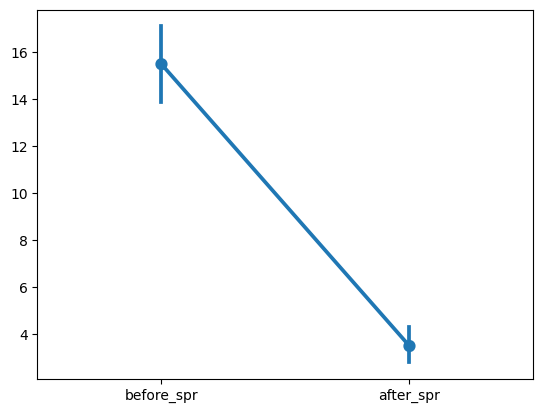

In [ ]:
import seaborn as sns
sns.pointplot(data=df)